# Lab 5

1. 提交作業之前，建議可以先點選上方工具列的**Kernel**，再選擇**Restart & Run All**，檢查一下是否程式跑起來都沒有問題，最後記得儲存。
2. 請先填上下方的姓名(name)及學號(stduent_id)再開始作答，例如：
```python
name = "我的名字"
student_id= "B06201000"
```
3. 演算法的實作可以參考[lab-5](https://yuanyuyuan.github.io/itcm/lab-5.html), 有任何問題歡迎找助教詢問。
4. **Deadline: 12/11(Wed.)**

In [ ]:
name = "陳彥宇"
student_id = "B05303134"

---

# Exercise 3
---
### Analyse the convergence properties of the Jacobi and Gauss-Seidel methods for the solution of a linear system whose matrix is
### $$\left[\begin{matrix}
    \alpha &&0 &&1\\
    0 &&\alpha &&0\\
    1 &&0 &&\alpha
    \end{matrix}\right],
    \quad \quad
    \alpha \in \mathbb{R}.$$

> Please write down your analysis in detail with LaTeX/Markdown at here. And if you need to do some numerical experiments, you can add more blocks to test your codes at below.

### Jacobi Method
Let $A$ be the matrix
$\begin{bmatrix}\alpha & 0 & 1 \\ 0 & \alpha & 0 \\ 1 & 0 & \alpha \end{bmatrix}$ for $\alpha\in\mathbb{R}$. The matrix $A$ can be decomposed into the three matrix, $L$, $D$, and $U$, such that $A=L+D+U$, where $L= \begin{bmatrix} 0 & 0 & 0 \\ 0 & 0 & 0 \\ 1 & 0 & 0 \end{bmatrix}$, $D=\begin{bmatrix}\alpha & 0 & 0 \\ 0 & \alpha & 0 \\ 0 & 0 & \alpha \end{bmatrix}$, and $U=\begin{bmatrix} 0 & 0 & 1 \\ 0 & 0 & 0 \\ 0 & 0 & 0 \end{bmatrix}$. The Jacobi iteration is thus follewed by 
$$x^{(n)} = D^{-1}(b-(L+U)x_{n-1})=\begin{bmatrix} b_1/\alpha \\ b_2/\alpha \\ b_3/\alpha \end{bmatrix} - \begin{bmatrix} 0 & 0 & 1/\alpha \\ 0 & 0 & 0 \\ 1/\alpha & 0 & 0 \end{bmatrix}x^{(n-1)}=\begin{bmatrix} (b_1-x_3^{(n-1)})/\alpha \\ b_2/\alpha \\ (b_3-x_1^{(n-1)})/\alpha \end{bmatrix},$$
provided by $\alpha\neq 0$ for $n\in\mathbb{N}$. Furthermore, if we defined the iteration matrix $G=-D^{-1}(L+U)=I-D^{-1}A$, then the error $e^{(n)}$ of the $n$th iteration can be computed by
$$e^{(n)} = G e^{(n-1)}= \begin{bmatrix} 0 & 0 & -1/\alpha \\ 0 & 0 & 0 \\ -1/\alpha & 0 & 0 \end{bmatrix}e^{(n-1)}=G^ne^{(0)}=\begin{cases}\begin{bmatrix} 0 & 0 & -1/\alpha^n \\ 0 & 0 & 0 \\ -1/\alpha^n & 0 & 0 \end{bmatrix}e^{(0)} \ &\text{if $n$ is odd.} \\ \begin{bmatrix} 1/\alpha^n & 0 & 0 \\ 0 & 0 & 0 \\ 0 & 0 & 1/\alpha^n \end{bmatrix}e^{(0)} \ &\text{if $n$ is even.} \end{cases}$$
Or simply $e^{(n)} = \begin{cases} \begin{bmatrix} -e_3^{(0)}/\alpha^n \\ 0 \\ -e_1^{(0)}/\alpha^n \end{bmatrix} \ &\text{if $n$ is odd.} \\ \begin{bmatrix} e_1^{(0)}/\alpha^n \\ 0 \\ e_3^{(0)}/\alpha^n \end{bmatrix} \ &\text{if $n$ is even.} \end{cases}$


From the explicit form of $e^{(n)}$, it is clear that $e^{(n)}\to 0$ as $n\to\infty$ if $|\alpha|>1$. Alternatively, since the eignvales of $G$ are $-1/\alpha$, $0$, and $1/\alpha$, $e^{(n)}$ converges to zero if and only if $\rho(G)=\max\{\lambda:\text{$\lambda$ is an eigenvalue of $G$}\}=1/|\alpha| < 1$, namely $|\alpha|>1$.

The rate of convergence can also be derived by $\lVert e^{(n)}\rVert \leq \lVert G \rVert \lVert e^{(n-1)}\rVert = \alpha^{-1} \lVert e^{(n-1)}\rVert$. That is, in this case, the Jacobi method is linear convergence.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

In [11]:
# For alpha = 2
A = np.array([[2, 0 , 1], [0, 2, 0], [1, 0, 2]])
b = np.array([1,1,1])

L = np.array([[0, 0 , 0], [0, 0, 0], [1, 0, 0]])
D = np.array([[2, 0 , 0], [0, 2, 0], [0, 0, 2]])
U = np.array([[0, 0 , 1], [0, 0, 0], [0, 0, 0]])
x_0 = np.array([1,1,1])

D_inv = LA.inv(D)
tmp = L+U
x = [D_inv @ (b-tmp @ x_0)]
er = []
for i in range(39):
    x.append(D_inv @ (b-tmp @ x[i]))
for i in range(39):
    er.append(LA.norm(x[-1]-x[i]))

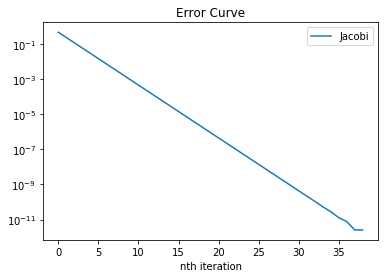

In [17]:
# plot of linear convergence 
plt.plot(er, label = 'Jacobi')
plt.xlabel('nth iteration')
plt.title(r'Error Curve')
plt.yscale('log')
plt.legend()
plt.show()

### Gauss-Seidel Method
Using the previous notations, the Gauss-seidel method is followed by
$$x^{(n)} = (L+D)^{-1}(b-Ux_{n-1})=\begin{bmatrix} b_1/\alpha \\ b_2/\alpha \\ b_3/\alpha-b_1/\alpha^2 \end{bmatrix} - \begin{bmatrix} 0 & 0 & 1/\alpha \\ 0 & 0 & 0 \\ 0 & 0 & -1/\alpha^2 \end{bmatrix}x^{(n-1)}=\begin{bmatrix} (b_1-x_3^{(n-1)})/\alpha \\ b_2/\alpha \\ b_3/\alpha-(b_1-x_3^{(n-1)})/\alpha^2 \end{bmatrix},$$
provided by $\alpha\neq 0$ for $n\in\mathbb{N}$. Also, if we defined the iteration matrix $G=-(L+D)^{-1}U=I-(L+U)^{-1}A$, then the error $e^{(n)}$ of the $n$th iteration can be computed by
$$e^{(n)} = G e^{(n-1)}= \begin{bmatrix} 0 & 0 & -1/\alpha \\ 0 & 0 & 0 \\ 0 & 0 & 1/\alpha^2 \end{bmatrix}e^{(n-1)}=G^ne^{(0)}=\begin{bmatrix} 0 & 0 & -1/\alpha^{2n-1} \\ 0 & 0 & 0 \\ 0 & 0 & 1/\alpha^{2n} \end{bmatrix}e^{(0)}=\begin{bmatrix} -e_3^{(0)}/\alpha^{2n-1} \\ 0 \\ e_3^{(0)}/\alpha^{2n} \end{bmatrix}.$$
Similarly, from the explicit form of $e^{(n)}$, it is clear that $e^{(n)}\to 0$ as $n\to\infty$ if $|\alpha|>1$. Alternatively, since the eignvales of $G$ are $0$, $0$, and $1/\alpha^2$, $e^{(n)}$ converges to zero if and only if $\rho(G)=1/\alpha^2 < 1$, namely $|\alpha|>1$. Notice that for fixed $|\alpha|>1$, $\rho(G_{\text{GS}}) < \rho(G_{\text{J}})$, which implies that $\lVert G_{\text{GS}} \rVert_\infty < \lVert G_{\text{J}} \rVert_\infty$ in this case.


The rate of convergence can also be derived by $\lVert e^{(n)}\rVert \leq \lVert G \rVert \lVert e^{(n-1)}\rVert = \alpha^{-2} \lVert e^{(n-1)}\rVert$. That is, the linear convergence. Moreover, since $\lVert G_{\text{GS}} \rVert_\infty < \lVert G_{\text{J}} \rVert_\infty$ the slope of Gauss-Seidel method should be less than that of Jacobi method. 

In [14]:
LD_inv = LA.inv(L+D)
y = [LD_inv @ (b-U @ x_0)]
err = []
for i in range(39):
    y.append(LD_inv @ (b-U @ y[i]))
for i in range(39):
    err.append(LA.norm(y[-1]-y[i]))

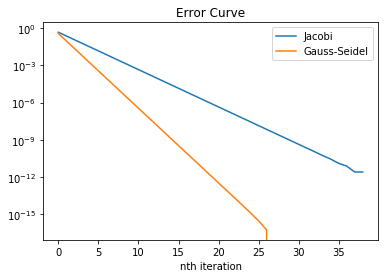

In [16]:
# Slope of Gauss-Seidel method is less than that of Jacobi method.
plt.plot(er,label = 'Jacobi')
plt.plot(err,label = 'Gauss-Seidel')
plt.xlabel('nth iteration')
plt.title(r'Error Curve')
plt.yscale('log')
plt.legend()
plt.show()